<a href="https://colab.research.google.com/github/SumitNikhade/Machine-learning/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the models with different base estimators
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgboost = XGBClassifier(n_estimators=100, random_state=42)

# Dictionary to store models
models = {
    'AdaBoost': adaboost,
    'Gradient Boosting': gbm,
    'XGBoost': xgboost
}

# Dictionary to store results
results = {}

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results).round(3)

<Figure size 1200x600 with 0 Axes>

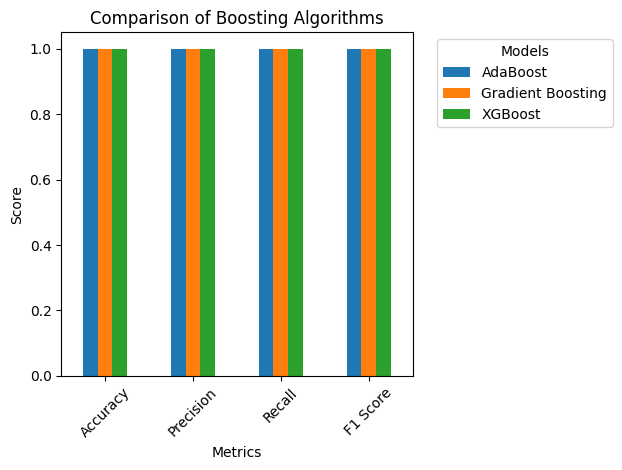

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar')
plt.title('Comparison of Boosting Algorithms')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Print the detailed results
print("\nDetailed Results:")
print(results_df)


Detailed Results:
           AdaBoost  Gradient Boosting  XGBoost
Accuracy        1.0                1.0      1.0
Precision       1.0                1.0      1.0
Recall          1.0                1.0      1.0
F1 Score        1.0                1.0      1.0



Classification Report - AdaBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



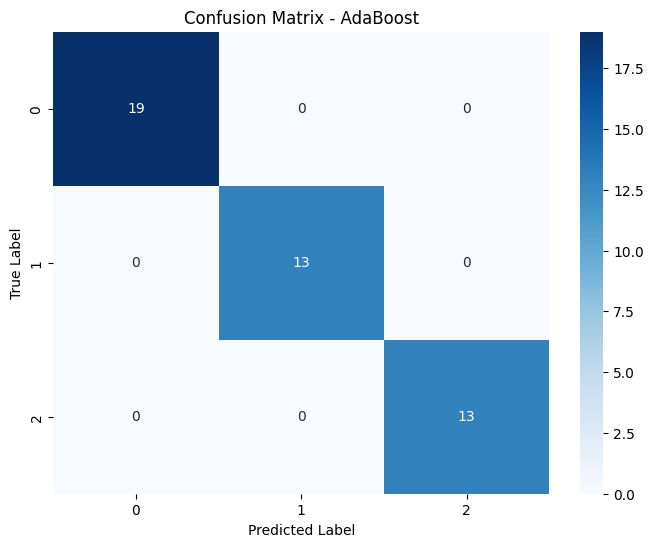


Classification Report - Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



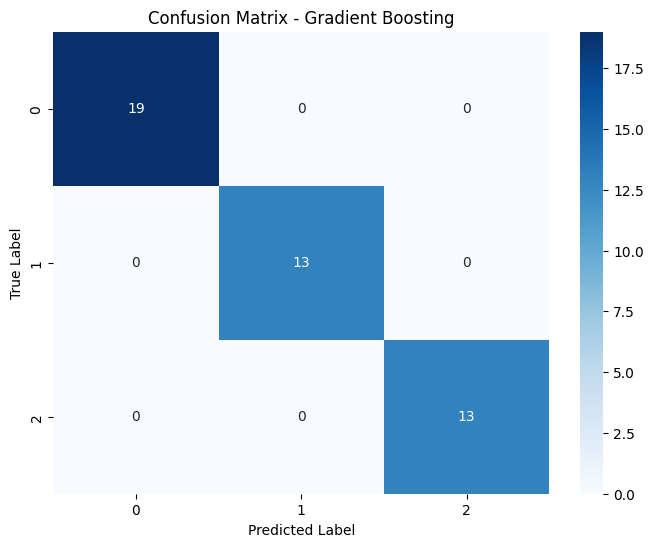


Classification Report - XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



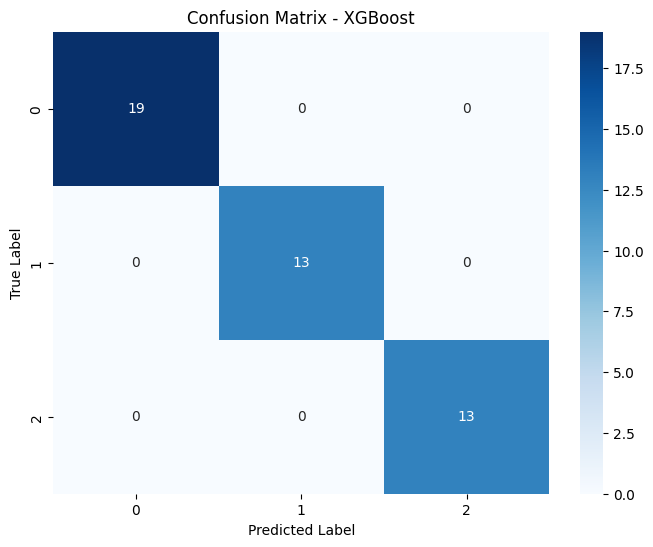

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrices for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nClassification Report - {name}")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, name)

<Figure size 1000x600 with 0 Axes>

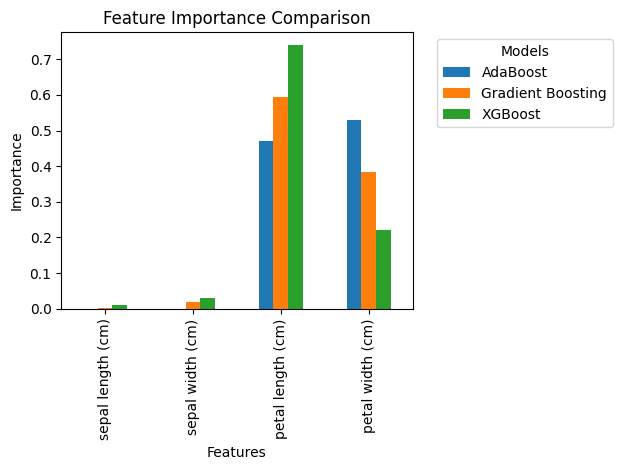

In [ ]:
# Feature importance comparison
feature_importance = pd.DataFrame()
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importance[name] = model.feature_importances_

feature_importance.index = iris.feature_names

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance Comparison')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()